## Importing Libraries

In [103]:
import pandas as pd # for handling dataset
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [104]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Third\Advertising.csv') 

In [105]:
df.head() # to display data from top 5 only 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [106]:
df.shape  # to see number of rows & columns

(200, 5)

In [107]:
df.columns # to display all the columns in the dataset

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [108]:
df.isnull().sum()  # to check null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#### there is no null values in dataset

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [110]:
df=df.drop(columns=['Unnamed: 0']) # dropping column Unnamed as it has no relation with sales prediction

In [111]:
df.describe() # to get high understanding of data

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [112]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Attribute Information

1- TV

2- radio

3- newspaper

4- sales

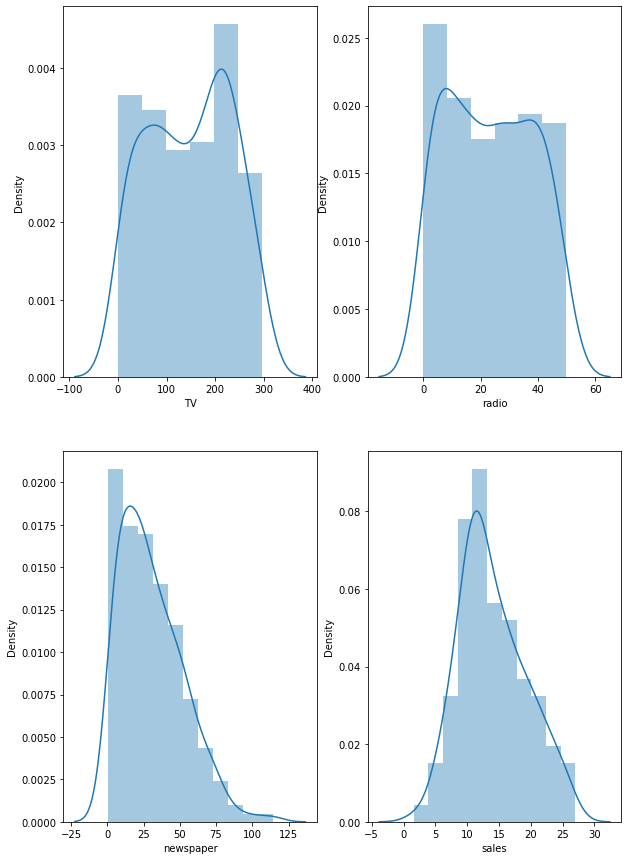

In [113]:
# lets visualize the data distributed in every column 
plt.figure(figsize=(10,15), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### data distribution of every features looks fine. As sales is our label/target so we omit drawing any inference from it.

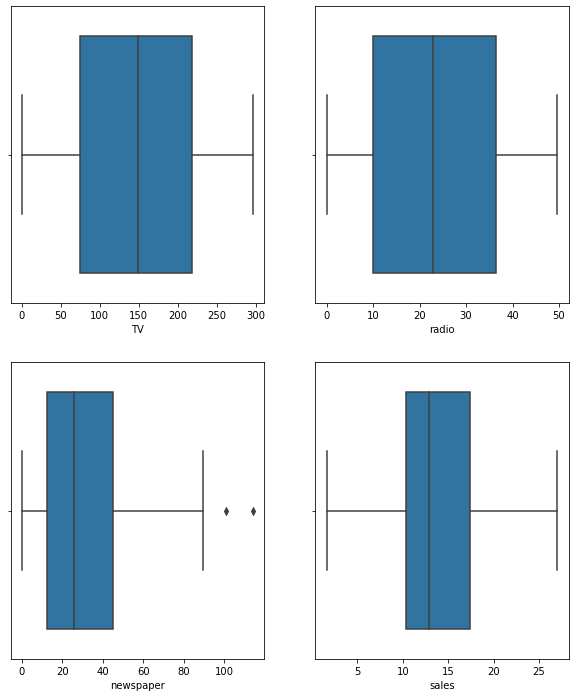

In [114]:
# to visualize columns in boxplot
plt.figure(figsize=(10,12), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### there is no considerable outliers present in the data

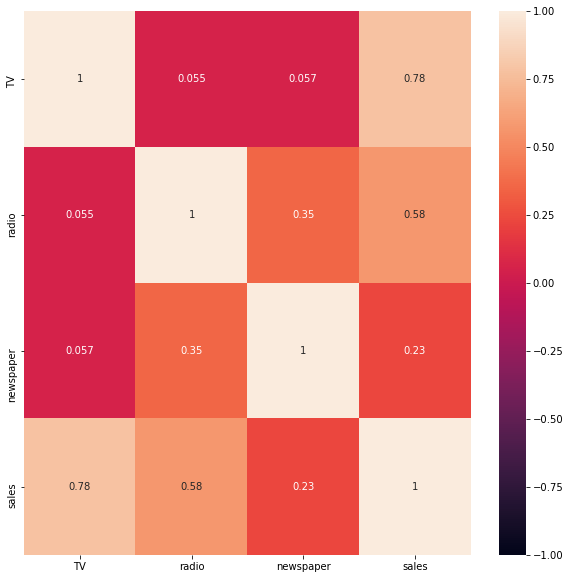

In [115]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Through heatmap we can draw inference that TV advertising has better correlation with sales. Then comes radio . newspaper is showing least value when predicting sales.

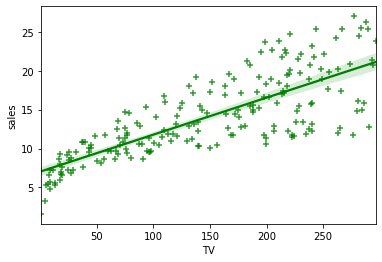

In [116]:
ax=sns.regplot(x='TV', y='sales', data=df, color='green', marker='+')

### showing positive linear relationship of TV with sales

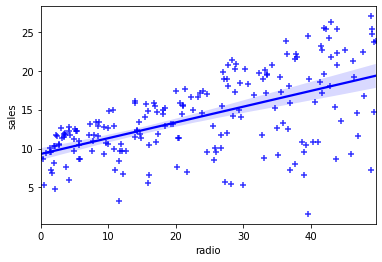

In [117]:
ax=sns.regplot(x='radio', y='sales', data=df, color='blue', marker='+' )

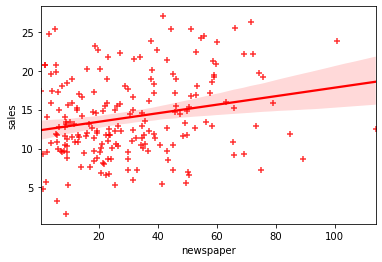

In [118]:
ax=sns.regplot(x='newspaper', y='sales', data=df, color='red', marker='+' )

### for newspaper it is having a distorted value

In [119]:
y = df['sales']
X = df.drop('sales', axis = 1)

In [120]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [121]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


### No Multicollinearity problem exists

In [122]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 100)

In [123]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

## Model instantiating and training

In [124]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

## Predicting the Sales

In [125]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [126]:
print('The sales prediction is :', regression.predict(scalar.transform([[44.5,39.3,45.1]])))

The sales prediction is : [12.33930625]


In [127]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.892804847190598

In [128]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.9058622107532246

In [129]:
# lets plot and visualize
y_pred = regression.predict(x_test)

In [130]:
r2_score(y_test,y_pred)

0.9058622107532246

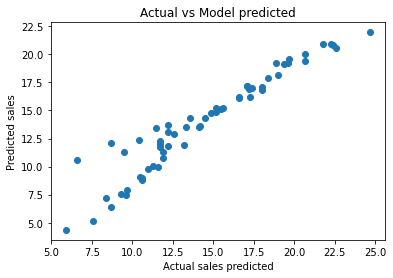

In [131]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales predicted')
plt.ylabel('Predicted sales')
plt.title('Actual vs Model predicted')
plt.show()

In [132]:
y_pred = regression.predict(x_test)

In [133]:
mean_absolute_error(y_test,y_pred)

1.0638483124072031

In [134]:
mean_squared_error(y_test,y_pred)

1.8506819941636956

In [135]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.360397733813055

### Using Regularization method to check whether our regression model is overfitting or not¶

In [136]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#### Lasso Regularization

In [137]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [138]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.009007507824099042

In [139]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.009007507824099042)

In [140]:
lasso_reg.score(x_test,y_test)

0.9061609360971438

#### Using Ridge regression model

In [141]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [142]:
ridgecv.alpha_

0.001

In [143]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [144]:
ridge_model.score(x_test,y_test)

0.9058619899683207

### our linear regression model accuracy look fine as we have used lasso & rigde regularization methods to cross check

## Using Decision Tree Regressor

In [145]:
# Lets first visualize the tree on the data without doing any pre processing
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [146]:
clf.score(x_train,y_train)

1.0

In [147]:
y_pred = clf.predict(x_test)

In [148]:
# Accuracy of our classification tree
clf.score(x_test,y_test)

0.9400453051314165

### Using GridSearchCV for hyper parameter tuning

In [149]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,30,3),
    'min_samples_leaf' : range (1,30,2),
    'min_samples_split' : range (2,30,2)
}

In [150]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 3),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [152]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [153]:
clf = DecisionTreeRegressor(max_depth =26, min_samples_leaf=3, min_samples_split=2)
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=26, min_samples_leaf=3)

In [154]:
clf.score(x_test,y_test)

0.9413389213053183

## Using Random Forest Regressor

In [155]:
rand_clf = RandomForestRegressor(n_estimators = 200,random_state=41)

In [156]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=41)

In [157]:
rand_clf.score(x_test,y_test)

0.9795288098190504

## Model Saving

In [158]:
# saving the model to local system
filename = 'Sales_model.pickle'
pickle.dump(regression,open(filename,'wb'))